# Support Vector Classifier

## Imports

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \ 
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report

## Loading the database

#### Read the csv file and study the database

In [ ]:
data = pd.read_csv("D:/College/Selected/Project/gender_classification_v7.csv")
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [ ]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

## Preprocessing

#### Define the target and the inputs

In [ ]:
target = data['gender']
inputs = data.drop(['gender'],axis=1)

#### Create a training and a testing dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365, stratify = target)

#### Check the result from the stratification

In [ ]:
y_train.value_counts(normalize = True)

Male      0.5
Female    0.5
Name: gender, dtype: float64

In [ ]:
pd.Series(y_test).value_counts(normalize = True)

NameError: ignored

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_rescaled = scaling.transform(x_train)
x_train_rescaled

NameError: ignored

## Classification

In [ ]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train)

## Evaluation

#### Evaluate the model on the test data

In [ ]:
y_pred_test = svc.predict(scaling.transform(x_test))

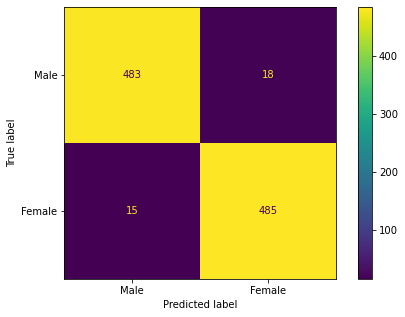

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels=["Male", "Female"],
)

cmp.plot(ax=ax);

#loss curve
#ROC curve

In [ ]:
print(classification_report(y_test, y_pred_test, target_names = ["Male", "Female"]))

              precision    recall  f1-score   support

        Male       0.97      0.96      0.97       501
      Female       0.96      0.97      0.97       500

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [ ]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [ ]:
scores = ["precision", "recall"]

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(scaling.transform(x_test))
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.965 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.966 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.965 (+/-0.003) for {'C': 1, 'kernel': 'poly'}
0.971 (+/-0.007) for {'C': 10, 'kernel': 'poly'}
0.967 (+/-0.011) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.966 (+/-0.014) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.967 (+/-0.009) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

      Female       0.96      0.97      0.96       501
        Male       0.97      0.96      0.96       500

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.